# Prueba de los mejores modelos usando el conjunto de validación para R28

## Librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import joblib


## Lectura del dataframe del conjunto de validación

In [2]:
df = pd.read_csv('../data/r28/r28_val.csv', sep='|')

df.head()

,g45µ,sba,pf,so3,mgo,sio2,fe2o3,caot,al2o3,na2o,k2o,r28_iram1622
0,-0.301845,-1.198612,-1.121074,0.536559,-0.849034,-0.294480,-0.458304,1.686350,-0.617309,-0.897956,-0.494894,59.6
1,-0.150153,0.557920,0.918118,-0.404374,0.700183,-0.010421,0.246517,0.140514,-1.253249,-0.120228,-0.800224,55.2
2,7.187937,-3.457009,-0.426154,-1.251213,-0.676899,-0.509677,-0.892040,1.225670,-0.165997,-0.897956,-0.494894,58.8
3,-0.207037,0.959413,1.066216,0.630652,0.470669,-1.043364,-0.160110,0.652380,-1.150678,0.268635,-0.164121,58.7
4,-0.889650,0.206614,-0.881839,0.348372,0.757562,0.876188,1.005555,-0.801321,-0.248053,0.268635,0.192097,59.6


## Conjuntos X y Y para validación

In [3]:
X_val = df.drop(columns=['r28_iram1622'])
y_val = df['r28_iram1622']

## Carga de los modelos

In [4]:
model_rmse_path = '../model/r28_models/r28_best_model_rmse.joblib'
model_mae_path = '../model/r28_models/r28_best_model_mae.joblib'
model_r2_path = '../model/r28_models/r28_best_model_r2.joblib'

model_rmse = joblib.load(model_rmse_path)
model_mae = joblib.load(model_mae_path)
model_r2 = joblib.load(model_r2_path)

## Predicciones con cada modelo

In [5]:
y_val_pred_rmse = model_rmse.predict(X_val)
y_val_pred_mae = model_mae.predict(X_val)
y_val_pred_r2 = model_r2.predict(X_val)

## Gráficas de comparación de los valores reales vs predichos

### Métrica RMSE

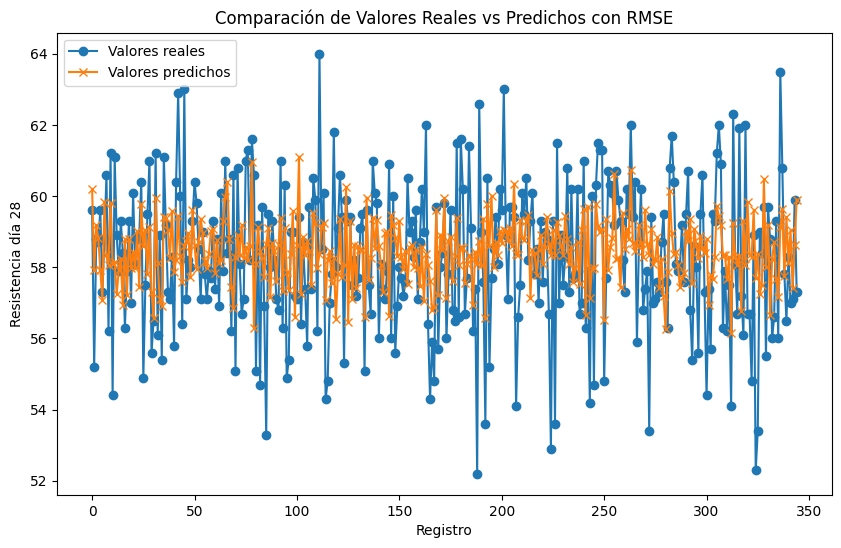

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Valores reales', marker='o')
plt.plot(y_val_pred_rmse, label='Valores predichos', marker='x')
plt.title("Comparación de Valores Reales vs Predichos con RMSE")
plt.xlabel("Registro")
plt.ylabel("Resistencia día 28")
plt.legend()
plt.show()

### Métrica MAE

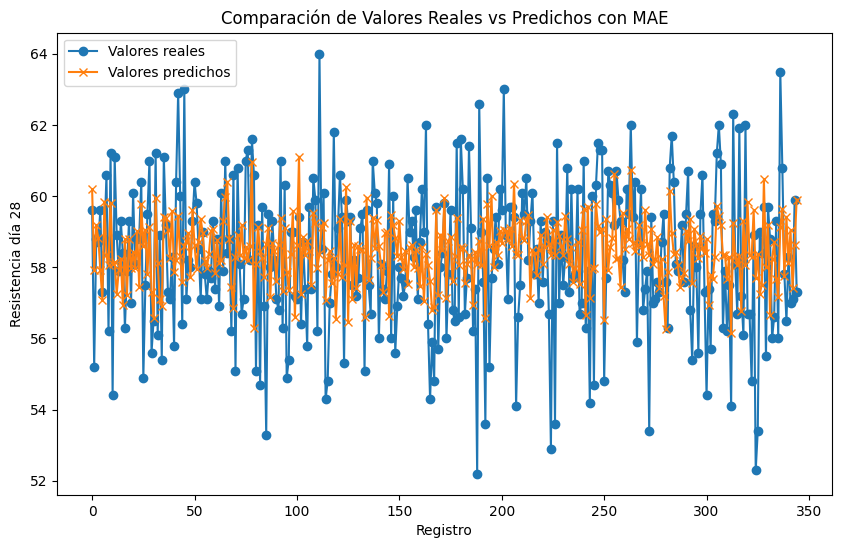

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Valores reales', marker='o')
plt.plot(y_val_pred_mae, label='Valores predichos', marker='x')
plt.title("Comparación de Valores Reales vs Predichos con MAE")
plt.xlabel("Registro")
plt.ylabel("Resistencia día 28")
plt.legend()
plt.show()

### Métrica R²

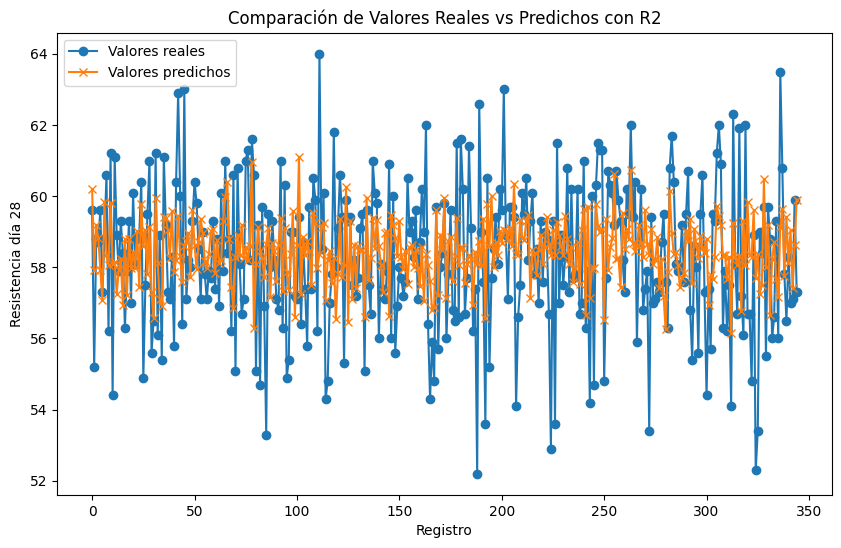

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Valores reales', marker='o')
plt.plot(y_val_pred_r2, label='Valores predichos', marker='x')
plt.title("Comparación de Valores Reales vs Predichos con R2")
plt.xlabel("Registro")
plt.ylabel("Resistencia día 28")
plt.legend()
plt.show()

## Distribución de los conjuntos para R7

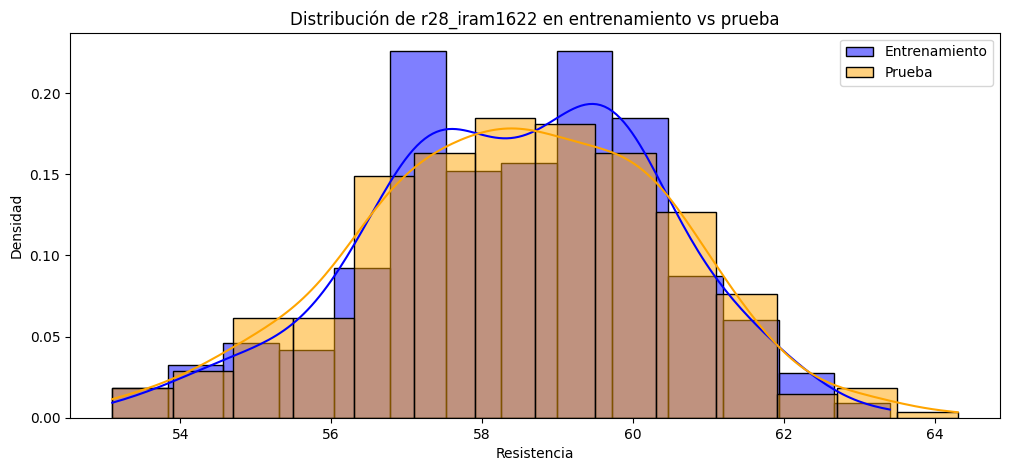

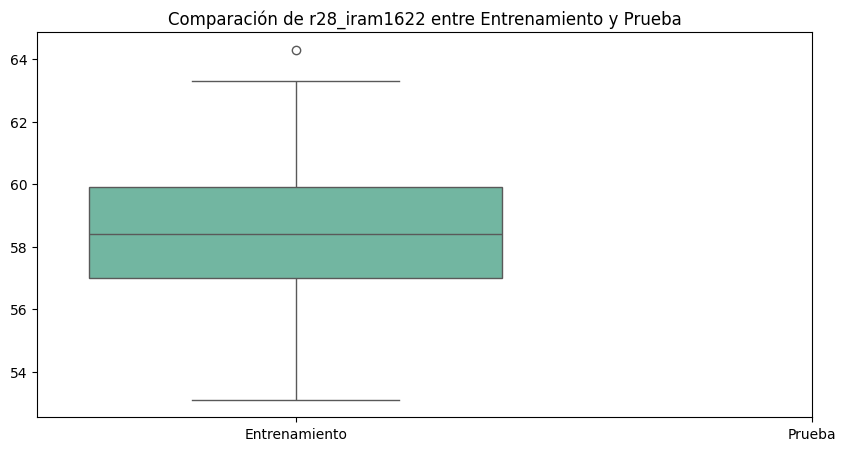

In [9]:
train_data = pd.read_csv('../data/r28/r28_train.csv', sep='|')
test_data = pd.read_csv('../data/r28/r28_test.csv', sep='|')

column = 'r28_iram1622'

# Histograma
plt.figure(figsize=(12, 5))
sns.histplot(train_data[column], color='blue', label='Entrenamiento', kde=True, stat="density")
sns.histplot(test_data[column], color='orange', label='Prueba', kde=True, stat="density")
plt.xlabel("Resistencia")
plt.ylabel("Densidad")
plt.legend()
plt.title(f'Distribución de {column} en entrenamiento vs prueba')
plt.show()

# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=[train_data[column], test_data[column]], palette="Set2")
plt.xticks([0, 1], ['Entrenamiento', 'Prueba'])
plt.title(f'Comparación de {column} entre Entrenamiento y Prueba')
plt.show()

## Resumen de las estadísticas de los conjuntos de entrenamiento y prueba

In [10]:
# Estadísticas resumen para el conjunto de entrenamiento
print("Estadísticas del conjunto de entrenamiento:\n", train_data.describe())

# Estadísticas resumen para el conjunto de prueba
print("Estadísticas del conjunto de prueba:\n", test_data.describe())

Estadísticas del conjunto de entrenamiento:
              g45µ         sba          pf         so3         mgo        sio2  \
count  295.000000  295.000000  295.000000  295.000000  295.000000  295.000000   
mean     0.028021    0.136182    0.059190    0.050782   -0.032510   -0.057224   
std      0.964299    0.986996    1.023785    0.781177    0.784569    1.026016   
min     -4.075177   -2.804583   -1.417269   -2.662612   -4.349119   -2.799367   
25%     -0.567305   -0.495999   -0.859055   -0.404374   -0.562142   -1.017540   
50%     -0.017423    0.106240   -0.346409   -0.028001    0.183777   -0.079284   
75%      0.437653    0.608107    1.054823    0.348372    0.470669    0.841757   
max      4.248908    3.267997    3.777543    3.077077    2.421536    1.642288   

            fe2o3        caot       al2o3        na2o         k2o  \
count  295.000000  295.000000  295.000000  295.000000  295.000000   
mean    -0.001227    0.021413   -0.060992   -0.000274    0.016403   
std      0.939222 

### Análisis Asimetría y Curtosis

#### Asimetría (Skewness)

La asimetría mide la simetría de la distribución de los datos. Indica si los datos están sesgados hacia la izquierda o hacia la derecha

* Asimetría positiva: La cola derecha de la distribución es más larga o más pesada que la cola izquierda. Los valores están sesgados hacia la derecha
* Asimetría negativa: La cola izquierda de la distribución es más larga o más pesada que la cola derecha. Los valores están sesgados hacia la izquierda
* Asimetría cercana a 0: La distribución es aproximadamente simétrica

#### Curtosis (Kurtosis)

La curtosis mide la "agudeza" de la distribución de los datos. Indica si los datos tienen colas más pesadas o más ligeras que una distribución normal

* Curtosis positiva (leptocúrtica): La distribución tiene colas más pesadas y un pico más alto y estrecho que una distribución normal. Indica la presencia de valores extremos
* Curtosis negativa (platicúrtica): La distribución tiene colas más ligeras y un pico más bajo y ancho que una distribución normal. Indica una menor presencia de valores extremos
* Curtosis cercana a 0 (mesocúrtica): La distribución tiene una forma similar a la distribución normal

La asimetría y la curtosis son métricas útiles para entender la distribución de tus datos. Ayudan a identificar posibles problemas de sesgo y la presencia de valores extremos, lo que puede influir en el rendimiento y la generalización de tu modelo

In [11]:
def print_skewness_kurtosis(data, dataset_name):
    skewness = data.skew()
    kurtosis = data.kurtosis()
    
    print(f"Asimetría y curtosis del conjunto de {dataset_name}:\n")
    print("Asimetría:")
    print(skewness)
    print("\nCurtosis:")
    print(kurtosis)
    print("\n")

print_skewness_kurtosis(train_data, "Entrenamiento")
print_skewness_kurtosis(test_data, "Prueba")

Asimetría y curtosis del conjunto de Entrenamiento:

Asimetría:
g45µ             0.217207
sba              0.218324
pf               0.376311
so3              0.730568
mgo             -1.389213
sio2            -0.037757
fe2o3            0.045467
caot             0.140348
al2o3            0.083551
na2o            -0.257646
k2o             14.810980
r28_iram1622    -0.245027
dtype: float64

Curtosis:
g45µ              2.686951
sba               0.446799
pf               -1.043451
so3               1.712473
mgo               5.344157
sio2             -1.438633
fe2o3            -1.049868
caot             -0.456969
al2o3            -0.830459
na2o             -1.421246
k2o             241.700796
r28_iram1622     -0.201514
dtype: float64


Asimetría y curtosis del conjunto de Prueba:

Asimetría:
g45µ            1.069549
sba             0.499640
pf              0.545231
so3             0.520394
mgo            -1.428279
sio2           -0.253525
fe2o3           0.264548
caot            0.151815


## Test de Kolmogorov-Smirnov

El test de Kolmogorov-Smirnov (KS) es una prueba estadística no paramétrica que se utiliza para comparar una muestra con una distribución de referencia (univariada) o para comparar dos muestras. El test mide la distancia máxima entre las funciones de distribución acumulativa (CDF) de las dos muestras o entre la muestra y la distribución de referencia

Interpretación de los resultados

* Estadístico KS: Este valor representa la distancia máxima entre las funciones de distribución acumulativa (CDF) de las dos muestras. Un valor más alto indica una mayor diferencia entre las distribuciones

* P-valor: Este valor indica la probabilidad de observar una distancia tan grande (o mayor) entre las CDFs bajo la hipótesis nula de que las dos muestras provienen de la misma distribución

    * P-valor bajo (por ejemplo, < 0.05): Rechazamos la hipótesis nula, lo que sugiere que las dos muestras provienen de distribuciones diferentes
    * P-valor alto (por ejemplo, ≥ 0.05): No rechazamos la hipótesis nula, lo que sugiere que no hay evidencia suficiente para decir que las dos muestras provienen de distribuciones diferentes

In [12]:
column = 'r28_iram1622'

ks_statistic, p_value = ks_2samp(train_data[column], test_data[column])

print(f"Kolmogorov-Smirnov test para la característica {column}:")
print(f"Estadístico KS: {ks_statistic}")
print(f"P-valor: {p_value}")

Kolmogorov-Smirnov test para la característica r28_iram1622:
Estadístico KS: 0.03920412675018423
P-valor: 0.9565532739616467


## Prueba con datos individuales

In [13]:
nuevos_datos = pd.DataFrame({
    'g45µ': [0.1153077297169385],
    'sba': [-0.5461855488003998],
    'pf': [-0.7337414236344953],
    'so3': [-0.3102805151549646],
    'mgo': [-0.5621423068459931],
    'sio2': [0.540482006596798],
    'fe2o3': [-0.648063162644343],
    'caot': [0.2121748080122585],
    'al2o3': [0.3878869412718271],
    'na2o': [0.8519306917922146],
    'k2o': [-0.036900123473081047]
})

In [14]:
# Hacer predicciones con los modelos cargados
pred_rmse = model_rmse.predict(nuevos_datos)
pred_mae = model_mae.predict(nuevos_datos)
pred_r2 = model_r2.predict(nuevos_datos)

values_models = [pred_rmse, pred_mae, pred_r2]

print("Predicciones con el modelo RMSE:", pred_rmse)
print("Predicciones con el modelo MAE:", pred_mae)
print("Predicciones con el modelo R2:", pred_r2)

Predicciones con el modelo RMSE: [59.11821219]
Predicciones con el modelo MAE: [59.11821219]
Predicciones con el modelo R2: [59.11821219]


In [15]:
print(f"Rango prediccion modelos {min(values_models)} - {max(values_models)}")

Rango prediccion modelos [59.11821219] - [59.11821219]
